### Linear Regression 2D

Implementation of linear regression with a single feature

***
#### Environment
`conda activate sklearn-env`

***
#### Goals

- Mathematical intuition
- Run gradient descent
- Visualize cost values during gradient descent run
- Visualize (2D) hypothetis during gradient descent run
- Predict (score) MPG for the first dataset row  

***
$\mathbf{\text{Univariate Linear regression}}$<br>
***
- #### Hypothesis $$h_{\theta}(x) = {\theta}_{0} +{\theta}_{1}X_{1}$$ <br> or <br> $$h_{\theta}(x) = {\theta}^TX$$

- #### Cost function J $$ J(\theta) = \frac{1}{2m} \sum _{i=1} ^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

- Gradient descent <br> 
  repeat until convergence $${\theta}_{j} := {\theta}_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J_{\theta}$$ 
   <br> or <br>
  repeat until convergence { $${\theta}_{0} := {\theta}_{0} - \alpha \frac{1}{m} \sum _{i=1} ^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) $$  <br> $${\theta}_{1} := {\theta}_{1} - \alpha \frac{1}{m} \sum _{i=1} ^{m} (h_{\theta}(x^{(i)}) - y^{(i)})  x^{(i)}_1 $$ }

- Features scaling $$ x_{i} := \frac{x_{i} - \mu_{i}}{s_{i}}$$

***

#### Basic python imports for panda (dataframe), numpy (numeric computation), matplotlib (visualization) packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

#### Dataset load from CSV located on UCI website.

http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data  
If the URL does not work the dataset can be loaded from the data folder `./data/auto-mpg.data`.

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

#### Keep original dataset imutabe and copy its content in a new dataset for further changes

In [3]:
dataset = raw_dataset.copy()
dataset.tail()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1

#### Display total count of missing values 

In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

#### Eliminate missing values from dataset

In [5]:
dataset = dataset.dropna()

#### Use only `MPG` and `Weight` columns

In [6]:
train_dataset = dataset[['MPG', 'Weight']]
#train_dataset = dataset.drop(['Cylinders', 'Displacement', 'Horsepower', 'Acceleration', 'Model Year', 'Origin'], axis=1, inplace=False)
train_dataset.tail()

MPG  Weight
393  27.0  2790.0
394  44.0  2130.0
395  32.0  2295.0
396  28.0  2625.0
397  31.0  2720.0

#### Separate features(columns used to predict) and labels (predicted) columns

In [7]:
train_features = train_dataset.copy()
train_labels = train_features.pop('MPG')

#### Rescale features column to have values in [0,1] interval

In [8]:
stats = train_features.describe().transpose()[['mean', 'std', 'count', 'min', 'max']]
normalized_train_features = (train_features - stats['mean'].transpose()) /  stats['std'].transpose()
normalized_train_features.tail()

Weight
393 -0.220842
394 -0.997859
395 -0.803605
396 -0.415097
397 -0.303253

#### Insert $X_0$ column as static value (1.0) in order to match $\theta$ vector length

In [9]:
normalized_ones_features = normalized_train_features.copy()
normalized_ones_features.insert(0, 'Oness', 1.0)
normalized_ones_features.head()

Oness    Weight
0    1.0  0.619748
1    1.0  0.842258
2    1.0  0.539692
3    1.0  0.536160
4    1.0  0.554997

#### Run gradient descent and compute cost at every step 

In [10]:
def costFunction(X, y , theta):
    m = len(y)
    sqHipe = np.matmul(X , theta) - y
    cost = (1/(2*m)) * np.sum(sqHipe * sqHipe)
    return cost
    

def gradientDescent(X, y, theta, alpha, num_iter):
    m = len(y)
    jurnal = np.zeros(num_iter)
    theta_jurnal = np.zeros((num_iter, len(theta)))
    for iter in range(num_iter):
        theta = theta - alpha * (1/m) * np.sum(((np.matmul(X , theta) - y).transpose() * X.transpose()).transpose(), axis=0)
        jurnal[iter] = costFunction(X, y, theta)
        theta_jurnal[iter] = theta
    return theta, jurnal, theta_jurnal


theta = np.zeros(len(normalized_ones_features.columns))
alpha = 0.01;
num_iters = 400;
theta , jurnal, theta_jurnal = gradientDescent(normalized_ones_features.to_numpy(), train_labels.to_numpy(), theta, alpha, num_iters);
print(f"Hypothesis: h(X)= {theta[0]} + {theta[1]} * X")


Hypothesis: h(X)= 23.02505116061152 + -6.377863392405566 * X


#### Visualize cost reduction

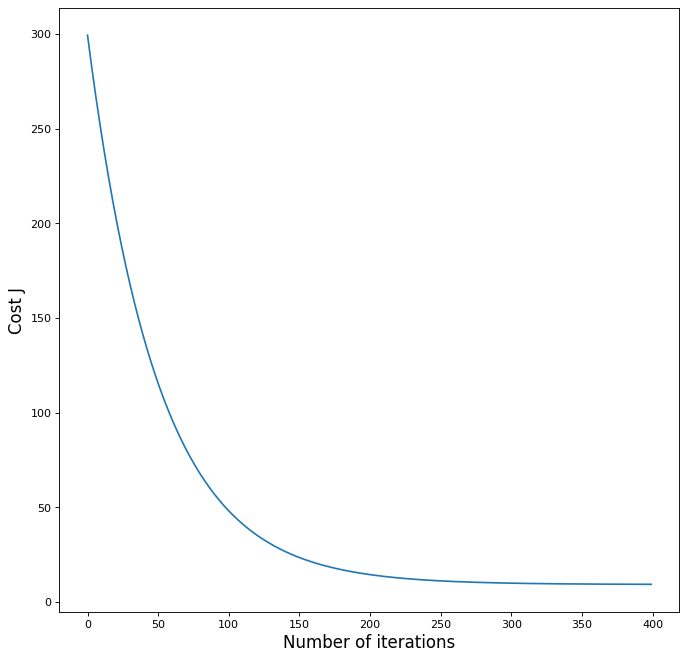

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

plt.plot(range(num_iters), jurnal)
plt.xlabel('Number of iterations' , fontsize=15)
plt.ylabel('Cost J' , fontsize=15)
plt.show()

#### Visualize hypothesis during gradient descent run 

In [12]:
draw_range = np.linspace(stats['min']['Weight'],stats['max']['Weight'],  stats['count']['Weight'].astype(int))
draw_range_scaled = (draw_range-stats['mean']['Weight']) / stats['std']['Weight']
X=np.ones((len(draw_range_scaled),len(theta)))
X.shape
X[:,1:]=draw_range_scaled[:,np.newaxis]
y = np.matmul(X , theta)

y_jurnal = np.matmul(X , theta_jurnal.transpose())


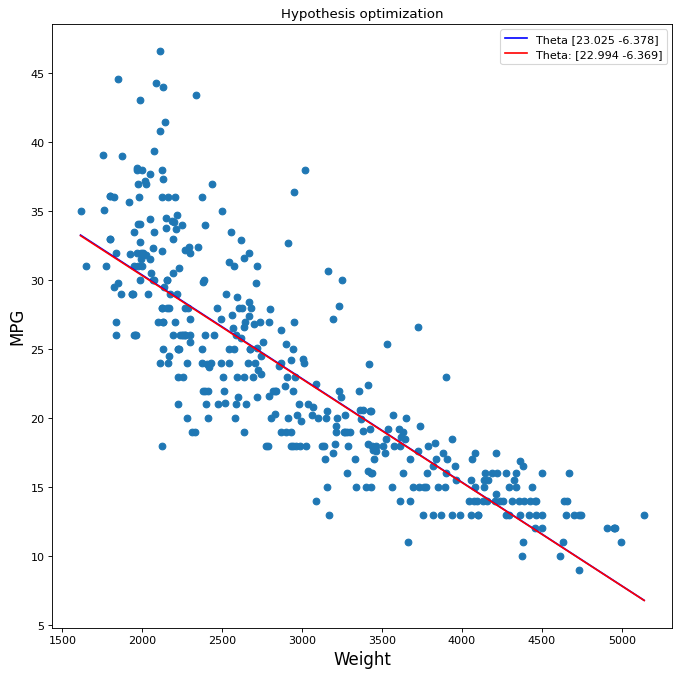

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
ax.set_title('Hypothesis optimization')

ax.set_xlabel(r'Weight', fontsize=15)
ax.set_ylabel(r'MPG', fontsize=15)

ax.scatter(train_features,train_labels)
final_line, = ax.plot(draw_range,y, color='b', label="Theta "+ str(theta))

l, = ax.plot([],[], color='r', label="Hypothesis optimization")

ax.legend(loc="upper left",  shadow=True, title="Legend")
ax.get_legend().get_title().set_color("red")

def animate(i):
    l.set_data(draw_range,  y_jurnal[:,i*8])
    l.set_label("Theta: "+ str(theta_jurnal[i*8]))
    ax.legend()

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=int(num_iters/8))

from IPython.display import HTML
anim = HTML(ani.to_jshtml())

anim

#HTML(ani.to_html5_video())

#### Predict `MPG` for the first element from dataset based on car `Weight`

In [14]:
score_input = (train_features.head(1).to_numpy()[0] -  stats['mean'].transpose()) /  stats['std'].transpose();
score_elem = np.insert(score_input.to_numpy(),0,1,axis=0)

In [15]:
test_mpg = np.matmul(score_elem , theta)
print("Predicted MPG:" ,test_mpg,  " actual value ", train_labels.head(1).to_numpy()[0])

Predicted MPG: 19.072380987398823  actual value  18.0
